<a href="https://colab.research.google.com/github/pandeykriti/Sentimental-Analysis-of-News-Headlines-of-Reddit/blob/main/Usingsqlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
!pip install -q praw
import praw
 
reddit = praw.Reddit(client_id='v04FYUyL6rMHFQ',
                     client_secret='UrC8OzxU9ZQoO-dJbOIXBJADxHX_rQ',
                     user_agent='Kritika Pandey')

     |████████████████████████████████| 163kB 3.3MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 


In [3]:
headlines = set()
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

770


In [5]:
import nltk
nltk.downloader.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[{'compound': -0.1027,
  'headline': 'Biden offers to keep 2017 Trump tax cuts intact in infrastructure counteroffer to '
              'GOP',
  'neg': 0.138,
  'neu': 0.75,
  'pos': 0.113},
 {'compound': 0.0,
  'headline': "What Fauci's emails reveal -- and what they don't",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': "Manchin says he won't vote for Democrats' sweeping election reform bill",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.138,0.750,0.113,-0.1027,Biden offers to keep 2017 Trump tax cuts intac...
1,0.000,1.000,0.000,0.0000,What Fauci's emails reveal -- and what they don't
2,0.000,1.000,0.000,0.0000,Manchin says he won't vote for Democrats' swee...
3,0.244,0.756,0.000,-0.4404,Republican governors yank unemployment aid eve...
4,0.000,1.000,0.000,0.0000,QAnon Already Has 19 Candidates Running for Co...


In [7]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.138,0.750,0.113,-0.1027,Biden offers to keep 2017 Trump tax cuts intac...,0
1,0.000,1.000,0.000,0.0000,What Fauci's emails reveal -- and what they don't,0
2,0.000,1.000,0.000,0.0000,Manchin says he won't vote for Democrats' swee...,0
3,0.244,0.756,0.000,-0.4404,Republican governors yank unemployment aid eve...,-1
4,0.000,1.000,0.000,0.0000,QAnon Already Has 19 Candidates Running for Co...,0


In [21]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [49]:
from pathlib import Path
Path('my_databases1.db').touch()

In [50]:
import sqlite3
conn = sqlite3.connect('my_databases1.db')
c = conn.cursor()

In [54]:
c.execute('''CREATE TABLE reddit_headlines_labels(Newsid INTEGER PRIMARY KEY, headline text,label int)''')


In [55]:
import pandas as pd
# load the data into a Pandas DataFrame
reddit_headlines_labels = pd.read_csv('reddit_headlines_labels.csv')
# write the data to a sqlite table
reddit_headlines_labels.to_sql('reddit_headlines_labels', conn, if_exists='append', index = False)

In [56]:
c.execute('''SELECT * FROM reddit_headlines_labels''').fetchall()

[(1,
  'Biden offers to keep 2017 Trump tax cuts intact in infrastructure counteroffer to GOP',
  0),
 (2, "What Fauci's emails reveal -- and what they don't", 0),
 (3,
  "Manchin says he won't vote for Democrats' sweeping election reform bill",
  0),
 (4,
  'Republican governors yank unemployment aid even as jobs shortfall continues',
  -1),
 (5, 'QAnon Already Has 19 Candidates Running for Congress in 2022', 0),
 (6, 'Workers Are Gaining Leverage Over Employers Right Before Our Eyes', 1),
 (7,
  'House Democrats propose an additional $547 billion for roads and bridges as infrastructure stalemate continues',
  0),
 (8,
  'Florida Is Moving the Ball Forward Against Big Tech Censorship | Opinion',
  0),
 (9,
  'Manchin will not support Democrats’ voting rights bill, he says in op-ed',
  -1),
 (10, 'FBI Director Wray compares ransomware threat to 9/11', -1),
 (11,
  'Manchin blasts Democrats\' voting rights bill, says pursuit of bipartisanship "not naive"',
  1),
 (12,
  '"We are trying 

In [57]:
pd.read_sql('''SELECT * FROM reddit_headlines_labels''', conn)

,Newsid,headline,label
0,1,Biden offers to keep 2017 Trump tax cuts intac...,0
1,2,What Fauci's emails reveal -- and what they don't,0
2,3,Manchin says he won't vote for Democrats' swee...,0
3,4,Republican governors yank unemployment aid eve...,-1
4,5,QAnon Already Has 19 Candidates Running for Co...,0
...,...,...,...
1536,1537,A Supreme Court Case Poses a Threat to L.G.B.T...,0
1537,1538,Five takeaways from a fiery New York City Demo...,-1
1538,1539,FBI inquiry of USPS chief DeJoy threatens bipa...,-1
1539,1540,"Republicans, Democrats battle for high ground ...",-1


In [58]:
pd.read_sql('''SELECT * FROM reddit_headlines_labels WHERE LABEL=1''',conn)

,Newsid,headline,label
0,6,Workers Are Gaining Leverage Over Employers Ri...,1
1,11,"Manchin blasts Democrats' voting rights bill, ...",1
2,18,Arizona Republican who ordered election audit ...,1
3,19,Joel Greenberg set for sentencing Aug. 19 afte...,1
4,23,Texas GOP Chair Who Branded Party With QAnon-e...,1
...,...,...,...
353,1522,People who've had COVID-19 vaccines should get...,1
354,1532,Justice Department to stop seizing reporter re...,1
355,1533,"Will Cuomo Run for a 4th Term? A $10,000-a-Pla...",1
356,1534,"Biden calls latest jobs report 'great news,' c...",1


In [59]:
pd.read_sql('''SELECT * FROM reddit_headlines_labels WHERE LABEL=-1''',conn)

,Newsid,headline,label
0,4,Republican governors yank unemployment aid eve...,-1
1,9,Manchin will not support Democrats’ voting rig...,-1
2,10,FBI Director Wray compares ransomware threat t...,-1
3,12,"""We are trying to cancel Coca-Cola"": North Car...",-1
4,15,A Federal Judge Overturned California’s Assaul...,-1
...,...,...,...
583,1531,The GOP is treating Jan. 6 the way white supre...,-1
584,1536,Texas Republican blames typo for proposed Sund...,-1
585,1538,Five takeaways from a fiery New York City Demo...,-1
586,1539,FBI inquiry of USPS chief DeJoy threatens bipa...,-1


In [ ]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Trump is cheerleading a long-shot lawsuit to audit votes in a Michigan county he already won in the 2020 election',
 "Hillary Clinton warns of 'huge consequences' in Afghan US troop withdrawal",
 'Trump endorses key Florida Republican right before special session on gambling',
 'Opinion: The Grand Orwell Party',
 'Gowdy: US intelligence community knows where COVID came from, even if Dr. Fauci does not']

Negative headlines:

['DeSantis says he will pardon Floridians charged with violating pandemic rules: ‘They’ve been treated poorly’',
 'The GOP is now built fully on lies',
 'Inflation worries mount as Biden pushes major government spending',
 "Joe Manchin says he won't support extending the $300 federal weekly unemployment benefit from Biden's stimulus",
 'McConnell privately assures GOP that Kyrsten Sinema will kill Biden’s tax hike: report']


In [ ]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

-1    340
 0    319
 1    165
Name: label, dtype: int64
-1    41.262136
 0    38.713592
 1    20.024272
Name: label, dtype: float64


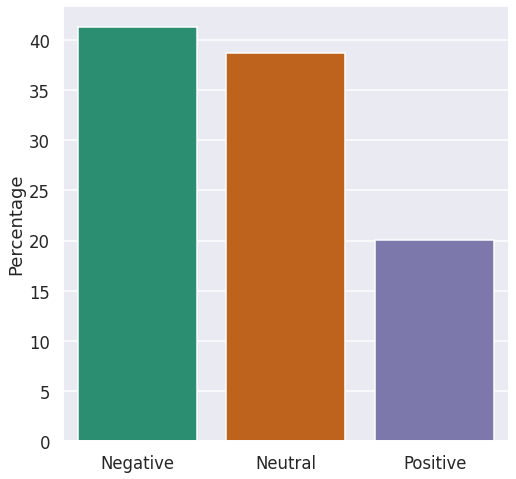

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [64]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer


example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [65]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [66]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [67]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [70]:
pos_lines = list(df2[df2.label == 1].headline)

pos_tokens = process_text(pos_lines)
neg_freq = nltk.FreqDist(pos_tokens)

neg_freq.most_common(20)

[('biden', 28),
 ('trump', 25),
 ('says', 18),
 ('new', 18),
 ('house', 13),
 ('justice', 13),
 ('state', 12),
 ('gop', 11),
 ('tax', 11),
 ('bill', 10),
 ('election', 10),
 ('us', 10),
 ('court', 10),
 ('democrats', 9),
 ('republican', 9),
 ('pride', 9),
 ('law', 9),
 ('big', 9),
 ('supreme', 9),
 ('emails', 8)]

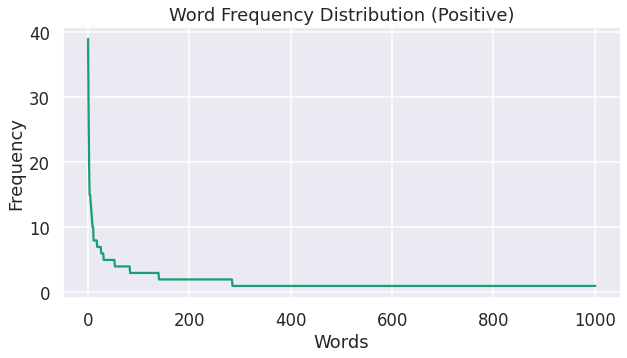

In [ ]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()


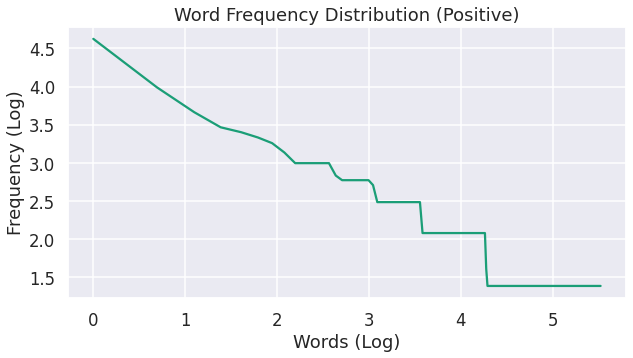

In [ ]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [ ]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('gop', 61),
 ('trump', 52),
 ('biden', 49),
 ('cheney', 32),
 ('says', 29),
 ('capitol', 29),
 ('republicans', 28),
 ('riot', 24),
 ('unemployment', 21),
 ('israel', 19),
 ('house', 18),
 ('liz', 18),
 ('us', 17),
 ('bill', 17),
 ('6', 17),
 ('federal', 14),
 ('people', 14),
 ('u', 14),
 ('greene', 14),
 ('election', 13)]

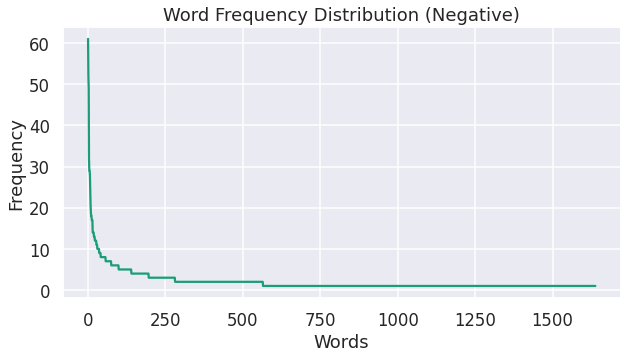

In [ ]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

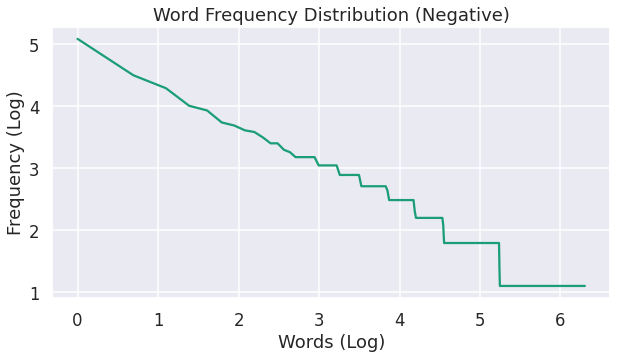

In [ ]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [ ]:
import math
import random
from collections import defaultdict
from pprint import pprint

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

In [ ]:
df = pd.read_csv('reddit_headlines_labels.csv', encoding='utf-8')
df.head()

,headline,label
0,DeSantis says he will pardon Floridians charge...,-1
1,The GOP is now built fully on lies,-1
2,Inflation worries mount as Biden pushes major ...,-1
3,Nancy Pelosi is keeping a mask mandate on the ...,0
4,Ocasio-Cortez on Taylor Greene: 'These are the...,0


In [ ]:
df = df[df.label != 0]
df.label.value_counts()

-1    340
 1    165
Name: label, dtype: int64

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

s1 = "Senate panel moving ahead with Mueller bill despite McConnell opposition"
s2 = "Bill protecting Robert Mueller to get vote despite McConnell opposition"

vect = CountVectorizer(binary=True)
X = vect.fit_transform([s1, s2])

X.toarray()

array([[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]])

In [ ]:
list(zip(X.toarray()[0], vect.get_feature_names()))

[(1, 'ahead'),
 (1, 'bill'),
 (1, 'despite'),
 (0, 'get'),
 (1, 'mcconnell'),
 (1, 'moving'),
 (1, 'mueller'),
 (1, 'opposition'),
 (1, 'panel'),
 (0, 'protecting'),
 (0, 'robert'),
 (1, 'senate'),
 (0, 'to'),
 (0, 'vote'),
 (1, 'with')]

In [ ]:
list(zip(X.toarray()[1], vect.get_feature_names()))

[(0, 'ahead'),
 (1, 'bill'),
 (1, 'despite'),
 (1, 'get'),
 (1, 'mcconnell'),
 (0, 'moving'),
 (1, 'mueller'),
 (1, 'opposition'),
 (0, 'panel'),
 (1, 'protecting'),
 (1, 'robert'),
 (0, 'senate'),
 (1, 'to'),
 (1, 'vote'),
 (0, 'with')]

In [ ]:
vect = CountVectorizer(max_features=1000, binary=True)
X = vect.fit_transform(df.headline)

X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.headline
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [ ]:
counts = df.label.value_counts()
print(counts)

print("\nPredicting only -1 = {:.2f}% accuracy".format(counts[-1] / sum(counts) * 100))

-1    340
 1    165
Name: label, dtype: int64

Predicting only -1 = 67.33% accuracy


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

In [ ]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(-1, 274), (1, 274)]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.8886861313868614

In [ ]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
        1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 76.24%

F1 Score: 62.50

COnfusion Matrix:
 [[57  9]
 [15 20]]


In [ ]:
from sklearn.model_selection import ShuffleSplit

X = df.headline
y = df.label

ss = ShuffleSplit(n_splits=10, test_size=0.2)
sm = SMOTE()

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # Oversample
    X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))


Average accuracy across folds: 71.49%

Average F1 score across folds: 57.14%

Average Confusion Matrix across folds: 
 [[52.9 15.3]
 [13.5 19.3]]


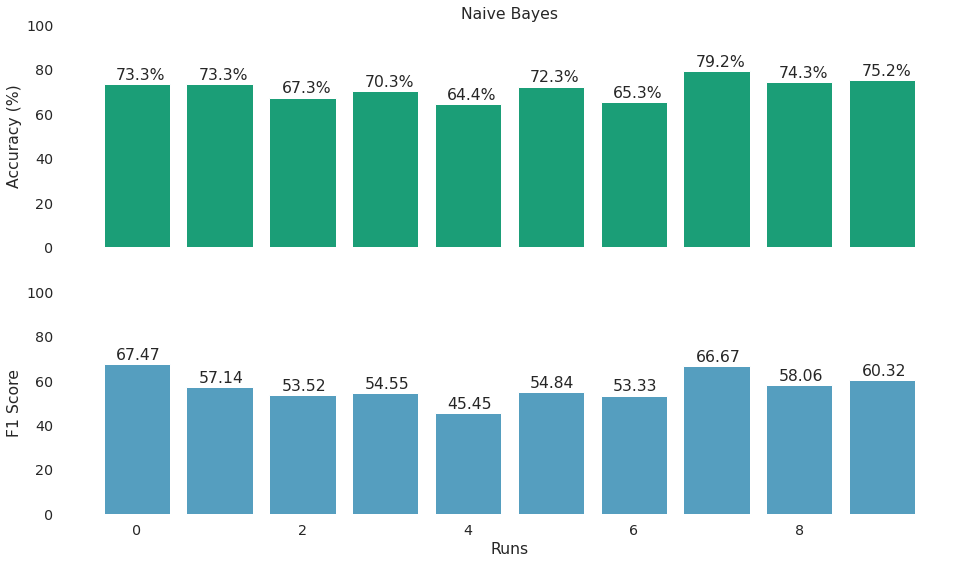

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Naive Bayes')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

X = df.headline
y = df.label

cv = ShuffleSplit(n_splits=20, test_size=0.2)

models = [
    MultinomialNB(),
    BernoulliNB(),
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    MLPClassifier()
]

sm = SMOTE()

# Init a dictionary for storing results of each run for each model
results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}

for train_index, test_index in cv.split(X):
    X_train, X_test  = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_vect = vect.fit_transform(X_train)    
    X_test_vect = vect.transform(X_test)
    
    X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    
    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)

In [ ]:
for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        """
    print(s)

MultinomialNB
------------------------------
        Avg. Accuracy: 70.25%
        Avg. F1 Score: 55.46
        Avg. Confusion Matrix: 
        
[[51.95 15.85]
 [14.2  19.  ]]
        
BernoulliNB
------------------------------
        Avg. Accuracy: 58.17%
        Avg. F1 Score: 50.88
        Avg. Confusion Matrix: 
        
[[36.75 31.05]
 [11.2  22.  ]]
        
LogisticRegression
------------------------------
        Avg. Accuracy: 65.10%
        Avg. F1 Score: 51.20
        Avg. Confusion Matrix: 
        
[[47.1  20.7 ]
 [14.55 18.65]]
        
SGDClassifier
------------------------------
        Avg. Accuracy: 66.39%
        Avg. F1 Score: 51.92
        Avg. Confusion Matrix: 
        
[[48.6  19.2 ]
 [14.75 18.45]]
        
LinearSVC
------------------------------
        Avg. Accuracy: 64.31%
        Avg. F1 Score: 51.42
        Avg. Confusion Matrix: 
        
[[45.8  22.  ]
 [14.05 19.15]]
        
RandomForestClassifier
------------------------------
        Avg. Accuracy:

In [ ]:
#Training on dataset "News Aggregator Dataset" having 400k news stories

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/uci-news-aggregator.csv"
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/uci-news-aggregator.csv",names=['text', 'label'],dtype={'label': object})


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# instantiate Vectorizer
vec = CountVectorizer()

# feed/learn the 'vocabulary' of the training data
vec.fit(sample_train_data)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [ ]:
# transform training data into a 'document-term matrix'
sample_train_dtm = vec.transform(sample_train_data)
sample_train_dtm

 

In [ ]:
sample_test_data = ['Country is looking to encourage agriculture schemes']
sample_test_dtm = vec.transform(sample_test_data)